# Assignment 2: The effect of the legalisation of recreational cannabis on alcohol related diseases. 
Assignment 1 has been left in the same layout as when it was submitted. Assignment 2 begins about half way down this notebook.

# Assignment 1 : Data collection and preliminary visualisations.

In this worksheet, data has been collected from various different websites in different formats in preparation for the second assignment.

# Section 1) extracting data from image. 

In [1]:
#import the necessary modules. 
from PIL import Image 
import pytesseract
from pytesseract import image_to_string

In [2]:
im = Image.open('2017_drug_and_alcohol.jpg')
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(im)
#print(text)

In [3]:
#The output of the image_to_string generates a lot of extra white space that we do not want as we need the data
#in a list format to put it into a table.

data = text.split('\n\n')   #eliminate the double white spaces
data = [states.split('\n') for states in data]        #eliminate the white space between elements 
#print(data)

#The image includes columns of State names and statistics split into 3. These are all mixed together but we can 
#seperate them into two lists by splicing the different components that we want.

states_1a = data[0:13]    #using slice indices to seperate the numbers from the states 
states_1b = data[14:17]
states_1c = data[18:21]

states_1a.extend(states_1b)
states_1a.extend(states_1c)    #add the lists together

states_final = []
for state_list in states_1a:
    for state in state_list:
        states_final.append(state)      #put all the states into one list 
print(states_final)
    

stats_1a = data[13]      #same process for the numbers
stats_1b =data[17]
stats_1c=data[21]
stats_1a.extend(stats_1b)
stats_1a.extend(stats_1c)
print(stats_1a)             

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Mlinois', 'Indiana', 'lowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
['27.63', '42.85', '40.71', '24.70', '26.30', '36.88', '40.61', '46.36', '55.48', '37.86', '23.75', '22.14', '28.25', '30.68', '39.70', '24.19', '23.14', '48.18', '31.57', '47.68', '44.43', '43.82', '40.98', '26.29', '20.14', '32.42', '36.27', '21.25,', '40.39', '48.78', '37.74', '56.22', '28.72.', '34.40', '24.36', '55.91', '35.87', '37.54', '50.17', 

The below table shows us the output of the image in a Panda dataframe.
This represents alcohol and drug related deaths per State. 

In [4]:
import pandas as pd 
df_im = pd.DataFrame(list(zip(states_final, stats_1a)), columns=['States', 'Deaths per 100,000, 2017'])
df_im

,States,"Deaths per 100,000, 2017"
0,Alabama,27.63
1,Alaska,42.85
2,Arizona,40.71
3,Arkansas,24.70
4,California,26.30
5,Colorado,36.88
6,Connecticut,40.61
7,Delaware,46.36
8,District of Columbia,55.48
9,Florida,37.86


Data from a second image containing only alcohol related deaths was also extracted in a similar way.
Unfortunately the slicing wasn't the same, otherwise a function could have been defined using the last image.

In [5]:
aa_im = Image.open('2017_alcohol_deaths_by_state_1.jpg')
aa_text = pytesseract.image_to_string(aa_im)
#print(aa_text)

In [6]:
aa_data = aa_text.split('\n\n')   #eliminate the double white spaces
    
aa_data = [states.split('\n') for states in aa_data]
#print(len(aa_data))
#print(aa_data)

states_2a = aa_data[0:13]    #using slice indices to seperate the numbers from the states 
states_2b = aa_data[20:23]
states_2c = aa_data[24:27]
#print(states_2c)

states_2a.extend(states_2b)
states_2a.extend(states_2c)    #add the lists together
#print(states_2a)

aa_states_final = []
for state_list in states_2a:
    for state in state_list:
        aa_states_final.append(state)      #put all the states into one list 
#print(aa_states_final)
    
stats_2a = aa_data[13:20]
stats_2b =aa_data[23:24]
stats_2c=aa_data[27:33]
stats_2a.extend(stats_2b)
stats_2a.extend(stats_2c)
#print(stats_2a)              

aa_stats_final =[]           #a second list for the numbers needed to be created this time
for stat_list in stats_2a:
    for stat in stat_list:
        aa_stats_final.append(stat)
#print(aa_stats_final)

In [7]:
aa_df = pd.DataFrame(list(zip(aa_states_final, aa_stats_final)), columns=['State', 'Deaths per 100,000 (2017)'])

#replace some incorrect values that the module didn't read correctly from the image.
aa_df= aa_df.replace({'WAL': 17.11, '7.A7': 7.17, '18.16.': 18.16, '‘Wyoming':'Wyoming' })  

#converting the strings to a float point for later analysis
aa_df['Deaths per 100,000 (2017)']=aa_df['Deaths per 100,000 (2017)'].astype(float)   
aa_df

#to be able to sort into ascending/descending order
#aa_df.sort_values(by=['Deaths per 100,000 (2017)'], ascending = 0)

#aa_csv = aa_df.to_excel("output.xlsx")
#aa_csv

aa_df = aa_df.drop(aa_df.index[8])  #dropped District of columbia as it is not a main state
aa_df = aa_df.reset_index(drop=True)
aa_df

,State,"Deaths per 100,000 (2017)"
0,Alabama,7.94
1,Alaska,21.49
2,Arizona,17.50
3,Arkansas,8.69
4,California,12.89
5,Colorado,18.16
6,Connecticut,9.87
7,Delaware,10.81
8,Florida,12.38
9,Georgia,8.13


# Section 2 Parsing data available on two different websites.

In [8]:
#import the modules 
from bs4 import BeautifulSoup
import requests

In [9]:
headers = {
    "user-agent": "Chrome/61.0.3163.100"
}
link = ('https://riveroakstreatment.com/drug-addiction/drug-overdose-deaths-state/')
website_url  = requests.get((link), headers).text

#make website into a beautiful soup object
soup = BeautifulSoup(website_url , 'html.parser')

#this marks the beginning of the section containing the relevant data
results1 = soup.find_all('div', attrs ={'class':'content'})
#results1

In [10]:
death_stats = soup.find('mark')
#print(death_stats)

all_stats = death_stats.find_all_next('p')
all_stats = all_stats[0:20]
#print(all_stats)

#all_stats is now one whole list containing seperate pieces of data. To make each element of the list obtainable
#they need to be seperated and the text extracted from between the HTML tags. 

all_stats = [element.text.split('\n') for element in all_stats]
list_stats = [outer[0:5] for outer in all_stats]

#There is a second header in the HTML format that is not needed in the final table
del list_stats[10][0]

In [11]:
#Putting the data into a table using Pandas
import pandas as pd

table_out = [] 
for element in list_stats:
    t_map ={}
    for i, t_str in enumerate(element):
        if i != 0:
            t_array = t_str.split(':')        #most pieces of the data are seperated by a :
            t_map[t_array[0]] = t_array[1]
        else:
            t_map["State"] = t_str[t_str.index('.')+1:].strip() #this is for the states data as it was not seperated
    table_out.append(t_map)                                         #by a :
df2 = pd.DataFrame(table_out)

#Only want the numbers in the table and not the units sign
def do_convert(tpl):
    s = tpl.replace('%', '')
    return float(s) 

#formatting the table, removing the % from the cells and rearranging the column order 
df2['Increase from 2013(%)'] = df2['Percent increase from 2013'].apply(do_convert)
df2 = df2.drop(['Percent increase from 2013'], axis=1)
df2 = df2 [['State', 'Total Deaths','Deaths per 100,000 people','Increase from 2013(%)']]
df2

,State,Total Deaths,"Deaths per 100,000 people",Increase from 2013(%)
0,West Virginia,1287,70.88,76.9
1,New Mexico,1174,56.22,21.9
2,Ohio,6518,55.91,93.2
3,District of Columbia,385,55.48,101.5
4,Pennsylvania,6425,50.17,93.3
5,New Hampshire,655,48.78,65.1
6,Kentucky,2146,48.18,53.5
7,Maine,637,47.68,93.7
8,Delaware,446,46.36,84.2
9,Maryland,2689,44.43,114.2


The above data that has been parsed will not be taken forward for further analysis ; as detailed in the project propsal.

A similar process for the next website: USA Today - America's drunkest States.

In [12]:
headers = {
    "user-agent": "Chrome/61.0.3163.100"
}
link = ('https://eu.usatoday.com/story/news/2018/03/08/these-americas-drunkest-states/406342002/')
website_url2  = requests.get((link), headers).text
soup2 = BeautifulSoup(website_url2 , 'html.parser')

#A list of the states can be obtained using specific tags in the webpage
l_states = soup2.find_all('h2', attrs ={'class':'presto-h2'})
l_states = [element.text for element in l_states] 
#l_states

In [13]:
import html

web_text = soup2.find_all('ul')
#print(first_result)

#Want to seperate out the elements inside the list and extract the text from the tags.
web_text = [ 
    element               # element bs object
    .text                 # extract text element  
    .replace('\xa0', ' ') # handle weird latin space 
    .split('\n')          # split on newline, into array
    for element in web_text
] 

web_text = [ outer[1:5] for outer in web_text] 
#print(type(web_text[0][0]))
#print(web_text)

In [14]:
#Time to put the data into a dataframe!
import pandas as pd

out = []
for element in web_text:   
    t_map = {}
    for t_str in element:
        t_arr = t_str.split(':')   #the title of the columns and the data are seperated by a :
        t_map[t_arr[0]] = t_arr[1]
    out.append(t_map)
df = pd.DataFrame(out)

#Sorting the data by specific values in specific columns
# df[df['Adults drinking excessively']>15]

In [15]:
import numpy as np

#The states are in a seperate object to the rest of the data.
N_states = np.array(l_states)   #make the list into an array 
df['States'] = N_states

#change the order of the columns
df=df[['States', 'Adults drinking excessively','Adults in fair or poor health','Alcohol-related driving deaths']]  

#df=df.drop('Drunkest metro area', axis=1)
df['Adults drinking excessively %'] = df['Adults drinking excessively'].apply(do_convert)
df['States'] = df['States'].str.replace('\d+', '')   #replace any number with blank space
#df

In [16]:
df['Adults in fair or poor health'].str.replace('%+', '')

#Columns with extra words spliced to leave just the desirable numbers
df['Adults in fair or poor health %']=df['Adults in fair or poor health'].str.slice(start=0, stop=5, step=1)
df['Alcohol-related driving deaths %']=df['Alcohol-related driving deaths'].str.slice(start=0, stop=5, step=1)
df = df.drop(['Adults drinking excessively','Adults in fair or poor health','Alcohol-related driving deaths'], axis=1)    #delete un-cleaned rows
df

,States,Adults drinking excessively %,Adults in fair or poor health %,Alcohol-related driving deaths %
0,. Tennessee,11.2,19.9,28.0
1,. West Virginia,11.4,23.7,32.0
2,. Utah,12.4,12.9,19.7
3,. Alabama,13.0,21.2,29.4
4,. Mississippi,13.3,22.2,23.3
5,. New Mexico,13.8,20.2,32.1
6,. Oklahoma,13.9,20.9,29.9
7,. North Carolina,14.9,18.5,32.3
8,. Arkansas,15.3,22.7,28.4
9,. Idaho,15.4,14.1,32.4


# Section 3 : Wikipedia and uploading CSV files.
Instead of scraping the table from Wikipedia, a simplier way is to convert the online table into a CSV file and upload that.

In [17]:
#pd.set_option('display.max_rows', None) 
wiki_data = pd.read_csv('Wiki page table.csv')
wiki_data =wiki_data.dropna(how='all')    #get rid of the blanks rows if the row is made up of all NaN's 
wiki_data = wiki_data.reset_index(drop=True) #reset the index after NaN's dropped, important later for merging tables
wiki_data = wiki_data.drop(['Transportation', 'Cultivation'], axis=1)
wiki_data

,State,Legal status,Recreational,Medical
0,Alabama,"Legal for medical use, limited THC content","felony, (1st-offense possession is a misdemeanor)",non-psychoactive CBD oil
1,Alaska,Legal,Legal,Legal
2,Arizona,Legal for medical use,Illegal,Legal
3,Arkansas,Legal for medical use,Illegal,Legal
4,California,Legal,Legal,Legal
5,Colorado,Legal,Legal,Legal
6,Connecticut,Legal for medical use,Decriminalized,legal
7,Delaware,Legal for medical use,Decriminalized,Legal
8,Florida,Legal for medical use,Illegal,Legal
9,Georgia,"Legal for medical use, limited THC content",Illegal,Legal


This table does not contain the dates cannabis was legalised / legalised for medical use which will be needed for analysis. Therefore a seperate Wikipedia page has been parsed to grab this information.

In [18]:
from bs4 import BeautifulSoup
import requests
import sys
import wikipedia

headers = {
    "user-agent": "Chrome/61.0.3163.100"
}
laws_link = ('https://en.wikipedia.org/wiki/Timeline_of_cannabis_laws_in_the_United_States')
website_url3  = requests.get((laws_link), headers).text
#website_url3

soup4 = BeautifulSoup(website_url3 , 'html.parser')
#soup4

leg_info = soup4.find_all('ul')
leg_info = [element.text for element in leg_info]   
#print(leg_info)

text = [element.split('\n') for element in leg_info]
#print(text)

In [19]:
prohibition = text[4]
#print(prohibition)
    
for element in prohibition:                #removing some of the content at the end of the sentence
    if element in prohibition[0:5]:
        element = element [:-3]
        print(element)
    else:
        element = element [:-4]
        print(element)

1911: Massachusetts requires a prescription for sales of Indian hemp
1913: California, Maine, Wyoming, and Indiana ban marijuana
1915: Utah and Vermont ban marijuana
1917: Colorado legislators made the use and cultivation of cannabis a misdemean
1923: Iowa, Oregon, Washington, and Vermont ban marijuana
1927: New York,[9] Idaho, Kansas, Montana, and Nebraska ban marijuana
1931: Illinois bans marijuana.
1931: Texas declared cannabis a narcotic, allowing up to life sentences for possession.
1933: North Dakota and Oklahoma ban marijuana.[10] By this year, 29 states have criminalized cannabis.


In [20]:
decrim = text[5]    #info regarding de-criminalising cannabis
#print(decrim)


#for element in decrim:
#    print(element)
for element in decrim:                #removing some of the content at the end of the sentence
    if element in decrim[8]:
        element = element [:-8]
        print(element)
    elif element in decrim[0]:
        element = element [:-8]
        print (element)
    elif element in decrim[6]:
        element = element [:-52]
        print(element)
    else:
        element = element [:-4]
        print(element)

1973: Texas law was amended to declare possession of four ounces or less a misdemeanor.
1973: Oregon became the first state to decriminalize cannabis – reducing the penalty for up to one ounce to a $100 fine.
1975: Alaska, Maine, Colorado, California, and Ohio decriminalized cannabis.
1975: Alaska's Supreme Court establishes that the right to privacy includes possession of small amounts of marijuana.
1976: Minnesota decriminalized cannabis.
1977: Mississippi, New York, and North Carolina decriminalized cannabis.[15] South Dakota also decriminalized cannabis, but the law was repealed almost immediately afterwards.
1978: Nebraska decriminalized cannabis.
1978: New Mexico passes the Controlled Substances Therapeutic Research Act, becoming the first state to enact legislation recognizing the medical value of marijuana.
1979: Virginia passed legislation allowing doctors to recommend cannabis for glaucoma or the side effects of chemotherapy.
1982: Alaska passes legislation to further decreas

In [21]:
leg_med = text[6]     #info regarding legalising medical cannabis 
#print(leg_med)

#for element in leg_med:
    #print(element)
    
for element in leg_med:
    if element in leg_med[8]:
        element = element
        print(element)
    elif element in leg_med[13]:
        element = element
        print(element)
    else:
        element = element[:-4]
        print(element)
    

1996: California became the first state to legalize medical cannabis with the approval of Proposition 215.[23] Arizona also passed a medical cannabis ballot measure, but it was rendered ineffective on a technicality.
1998: Oregon, Alaska, and Washington all legalized medical cannabis through ballot measure.[25] Nevada also passed a medical cannabis initiative, but it required second approval in 2000 to become law, as per the state constitution.
1999: Maine legalized medical cannabis through ballot measure.
2000: Hawaii became the first state to legalize medical cannabis through state legislature.
2000: Nevada and Colorado legalized medical cannabis through ballot measure.
2001: Nevada decriminalized cannabis through state legislature.
2003: Maryland passed legislation establishing reduced penalties for persons using cannabis due to a medical necessity (as established at trial).
2004: Vermont legalized medical cannabis through state legislature.
2004: Montana legalized medical cannabis 

In [22]:
leg_rec = text[7]   #a list containing the info regarding the legalisation of recreational use of cannabis
#print(leg_rec)

for element in leg_rec:
    if element in leg_rec[12]:
        element = element [:-8]
        print(element)
    else:
        element = element[:-4]
        print(element)
        
leg_df = pd.DataFrame(leg_rec)
leg_df.to_excel("legal dates.xlsx")

2012: Colorado and Washington become the first two states to legalize the recreational use of cannabis, following the passage of Amendment 64 and Initiative 502.[40]  Massachusetts approved a ballot measure to legalize medical canna
2013: Vermont decriminalized cannabis through state legislature.
2013: New Hampshire legalized medical cannabis through state legislature.
2013: Illinois legalized medical cannabis through state legislature.
2014: Utah became the first state to pass a low-THC, high-CBD medical cannabis law.  These laws allowed low-THC cannabis oil to be used for treatment of certain medical conditions (mostly seizure disorders) with a doctor's recommendation.
2014: Maryland legislators decriminalized cannabis and approved a comprehensive medical cannabis law, expanding the very limited measure that was passed in 2003.
2014: Missouri decriminalized cannabis through state legislature.
2014: Minnesota legalized medical cannabis through state legislature.
2014: New York legaliz

# Chronic liver disease data (by state)
More data was collected from the CDC database detailing Chronic Liver Disease/Cirrhosis Mortality by State.

In [23]:
liv_df = pd.read_csv('Chronic Liver Disease_Cirrhosis Mortality by State (1).csv')

#drop URL column from table
liv_df = liv_df.drop(['URL'], axis = 1)
liv_df = liv_df.dropna(how='all')

#convert year values from float to int
liv_df['YEAR'] = liv_df['YEAR'].astype(int)

#switch the year data into columns instead of rows
liv_df = liv_df.pivot(index ='STATE', columns ='YEAR')
liv_df = liv_df.dropna(how='all', axis=1)    #drop random NaN columns
liv_df = liv_df.dropna(how='all', axis=0)    #drop random NaN row

#the rate is per 100,000 , deaths = total deaths
liv_df.rename(columns={'RATE': 'Rate of death (per 100,000)', 'DEATHS': 'Total Deaths'}, inplace=True)
liv_df

Rate of death (per 100,000)                         Total Deaths         \
YEAR                         2005  2014  2015  2016  2017         2005   2014   
STATE                                                                           
AK                            9.0  10.7  15.4  16.3  15.1           52     84   
AL                            9.7  11.8  12.5  13.2  12.7          478    683   
AR                            7.5  10.4  12.1  11.8  11.3          228    369   
AZ                           12.7  14.3  15.0  14.9  14.3          757  1,084   
CA                           11.1  12.0  12.7  12.2  12.1        3,822  5,013   
CO                            9.5  12.7  12.2  12.4  14.0          436    743   
CT                            7.2   8.5   8.4   8.6   9.1          283    375   
DE                            7.3   9.3   9.6   7.5   8.9           67    110   
FL                           10.1  11.8  11.7  11.9  11.2        2,139  3,037   
GA                            8.2   8.6   9.0   9.0   9.8          689    935   
HI                            6.7   6.9   8.1   7.1   7.5           96    114   
IA                            6.6   8.8   9.1   9.4   9.2          215    319   
ID                            8.9  11.0  12.2   9.9  10.2          126    197   
IL                            7.8   9.2   8.7   9.4   9.3        1,002  1,323   
IN                            7.6  10.4  11.4  11.2  11.6          496    781   
KS                            6.9   8.9   9.7   9.8   9.7          200    286   
KY                            8.5  11.5  12.6  11.9  12.8          380    604   
LA                            8.2   9.8  10.5   9.7  10.0          380    515   
MA                            7.2   8.4   8.2   8.8   9.2          505    671   
MD                            7.9   6.9   6.7   6.7   6.6          459    484   
ME                            7.2   9.0  11.1  10.6  10.4          116    161   
MI                            9.5  10.0  10.8  10.2  10.9        1,010  1,198   
MN                            6.1   7.9   8.5   9.2   8.6          317    501   
MO                            6.7   8.8   9.6   9.1   9.3          419    623   
MS                            9.2  10.3  11.1  11.1  12.6          272    347   
MT                           11.7  12.2  15.7  13.6  16.1          120    150   
NC                            8.6  10.3  10.7  10.3  10.3          782  1,184   
ND                            9.7   7.7  11.6  12.4  11.0           68     61   
NE                            7.3   8.0   7.8   9.3   9.9          133    165   
NH                            8.2  10.1   9.3   9.6   9.1          114    180   
NJ                            7.8   7.5   7.3   7.4   7.3          730    794   
NM                           14.4  22.5  24.8  24.9  26.8          285    509   
NV                           11.1  12.2  14.5  12.3  13.3          275    392   
NY                            6.0   6.8   6.7   6.9   7.1        1,224  1,575   
OH                            8.8  10.4  10.7  10.9  11.2        1,105  1,456   
OK                           11.4  13.8  13.7  14.6  15.0          428    589   
OR                           10.0  12.8  13.7  12.2  12.6          394    599   
PA                            7.3   8.1   8.9   8.7   8.0        1,058  1,301   
RI                            9.0   9.1  10.6  11.5  11.2          107    116   
SC                           10.6  11.8  12.2  12.4  13.1          480    689   
SD                           10.3  16.3  16.1  16.4  17.2           83    130   
TN                            9.8  12.0  12.2  12.2  12.8          631    917   
TX                           11.7  13.5  13.8  13.5  13.9        2,459  3,680   
UT                            6.7   8.7   9.3   8.5   8.8          127    223   
VA                            7.3   8.7   9.6   9.2   9.6          570    837   
VT                            6.8   7.9   8.6   8.9   8.8           48     69   
WA                            8.6  11

# Section 4 : Merging information from different tables into one table. 
In this section, information from the dataframe containing alcohol_deaths_by_state.jpg data will be merged with information from the Wikipedia table.

In [24]:
#Make a copy of the table containing alcohol related deaths.
aa_cdf = aa_df.copy()

#for successful merging, the rows in each table need to match.
#aa_cdf = aa_cdf.drop(aa_cdf.index[8])  #dropped District of Columbia as it is not a main state
#aa_cdf = aa_cdf.reset_index(drop=True)

merge_cdf = aa_cdf.join(wiki_data['Legal status'] ,how ='left')   #works as the States are organised alphabetically.
merge_cdf = merge_cdf.join(wiki_data['Recreational'] ,how ='left')
#merge_cdf = merge_cdf.sort_values(by ='Recreational' )   #can now group the states by recreational status
merge_cdf

,State,"Deaths per 100,000 (2017)",Legal status,Recreational
0,Alabama,7.94,"Legal for medical use, limited THC content","felony, (1st-offense possession is a misdemeanor)"
1,Alaska,21.49,Legal,Legal
2,Arizona,17.50,Legal for medical use,Illegal
3,Arkansas,8.69,Legal for medical use,Illegal
4,California,12.89,Legal,Legal
5,Colorado,18.16,Legal,Legal
6,Connecticut,9.87,Legal for medical use,Decriminalized
7,Delaware,10.81,Legal for medical use,Decriminalized
8,Florida,12.38,Legal for medical use,Illegal
9,Georgia,8.13,"Legal for medical use, limited THC content",Illegal


Now we can see which states have which legal status. This highlights that there are not a lot of completely prohibited states, therefore the 'recreational' column from the Wiki_table has been added as well for later categorisation into groups.

# Section 5: Visualisation

In [25]:
#to have an initial understanding of the data we can calculate the mean and the standard deviation
av_deaths = aa_cdf['Deaths per 100,000 (2017)'].mean()
print(av_deaths)

st_dev = aa_cdf['Deaths per 100,000 (2017)'].std()
print(st_dev)

12.680200000000003
5.199004806652118


In [26]:
#to visualise the data in groups of Legality, the dataframe can be reordered and the index reset

cmerge_2= merge_cdf.copy()
cmerge_2 = cmerge_2.sort_values(by ='Legal status' )
cmerge_2= cmerge_2.reset_index(drop=True)
cmerge_2

,State,"Deaths per 100,000 (2017)",Legal status,Recreational
0,Maine,14.52,Legal,Legal
1,Nevada,17.11,Legal,Legal
2,Michigan,10.53,Legal,Legal
3,Massachusetts,9.96,Legal,Legal
4,Vermont,15.07,Legal,Legal
5,Mlinois,8.72,Legal,Decriminalized
6,Washington,15.56,Legal,Legal
7,Oregon,21.22,Legal,Legal
8,Colorado,18.16,Legal,Legal
9,California,12.89,Legal,Legal


In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt

#Further visualisations on the whole data to view the information in the table.
sd = st_dev
x = cmerge_2['State']
y=cmerge_2['Deaths per 100,000 (2017)']



sns.set_context('notebook' , font_scale = 1.5)
sns.set_style('whitegrid')
g = plt.figure(figsize=(20,5))     #change the size of the graphs so the x axis isn't squashed

#as we are using a dataframe as the input we can use seaborns lmplot function
g = sns.lmplot(x = 'State', y = 'Deaths per 100,000 (2017)', data = cmerge_2, fit_reg = False, hue = 'Legal status',
               height=5, aspect=3)
plt.errorbar(x, y, yerr = sd, ls='none')    #do not want the datapoints to be connected
g.set_xticklabels(list(cmerge_2['State']), rotation=90)
plt.show()

<Figure size 2000x500 with 0 Axes>

<Figure size 2015x500 with 1 Axes>

This now shows us the different groupings and how big our groups are. From this, further classification into groups for analysis can be decided as we want a fairly equal number in each group for comparison.

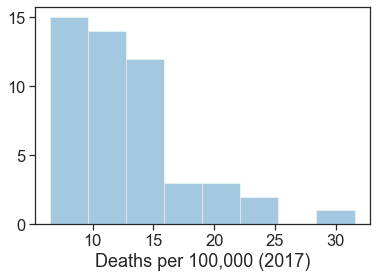

In [28]:
#A histogram can show us how the data is distributed, which is important for subsequent analysis 
sns.set_style('ticks')
sns.distplot(cmerge_2['Deaths per 100,000 (2017)'],kde = False)
plt.show()

The histogram shows a right-skewed (positive - skewness) distribution. This is not unsuprising as we only have 50 datapoints which represent the mean of each state. This will need to be tested statistically to see if the skewness is significantly different from 0. If it does we may need to do some transformations on the data.

# Assignment 2 : The effect of the legalisation of recreational cannabis on alcohol related diseases.

The layout of assignment 2 will follow that of a research paper, starting with a brief introduction to the research topic, followed by the methods, the results - containing statistical analysis described in the methods, along with visualisations where appropriate and lastly a brief discussion before concluding remarks.

_Please re-download the CSV files attached_

## 1) Introduction.
Alcohol related diseases are one of the top causes of death in the UK and one of the biggest strains on the NHS (NHS, 2018). The main treatment for alcohol related diseases is to stop drinking alcohol, with limited additional treatment strategies. The legalisation of cannabis has been a hot topic of debate over the last decade, with plentiful research supporting the benefits of medical cannabis in pain disorders, treatment resistant epilepsy and anxiety (Rahn, 2014). The potential beneficial effects of cannabis on alcohol related diseases are less explored.

Cannabis contains a group of chemical compounds called cannabinoids. The two main cannabinoids found in cannabis are cannabidiol (CBD) and tetrahydrocannabinol (THC), which both work endogenously in our endocannabinoid system (ECS) (Rahn, 2014; Cadina, 2018; Freeman et al., 2019). This system is complex and modulates many pathways including those in pain and sleep. The two main receptors in the ECS are CB-1 and CB-2 and these receptors are found in different ratios in the brain compared to in the body. One of the main biochemical differences between these two cannabinoids is their affinity for these receptors. Namely, THC has greater affinity to receptors in the brain (CB-1) whereas CBD binds with higher affinity to receptors in the body (CB-2) (Rahn, 2014; Cadena, 2018). Due to this binding pattern, THC has additional psychoactive properties. However, being only one atom different, THC and CBD share many common beneficial biological effects (Cadina, 2018). Additionally, it has been suggested that CBD modulates and decreases the psychoactive properties of THC, therefore a balance of the two is key for optimum therapeutic effect (Cadina, 2018). Individual cannabis strains have different quantities of these cannabinoids, and therefore exert diverse internal and external effects. However, most strains of street cannabis contain abnormally high THC levels and no CBD (NHS, 2018). Theoretically, the legalisation and consequential regularisation of street cannabis would decrease the psychoactive side effects associated with recreational cannabis use.

Professor David Nutt recently made a claim that legalising recreational cannabis would decrease the prevalence of alcohol related diseases. This hypothesis is going to be investigated in this study. Moreover, the relationship between cannabis and alcohol related disease will be explored via two measurements: alcohol consumption and the mortality rate of alcohol related diseases. Therefore, this study will focus on two research questions. Firstly, to discover if there is a relationship between legalising recreational cannabis and alcohol consumption. Secondly, to explore if legalising recreational cannabis would decrease the prevalence of alcohol related diseases. Although these factors are heavily related, separating them gives further insight into understanding the underlying mechanism cannabis may have on the prevalence alcohol related diseases.


## 2) Methods.
The data used in this study was aquired as detailed by Assignment 1. In brief, data was collected through scraping different websites via BeautifulSoup and extracting data from images via Pytesseract. Wikipedia tables were converted to CSV files and the data imported that way. Data was made uniform through the use of Panda and NumPy modules. The data is from the United States of America. To successfully compare between different legal statuses of recreational cannabis, data has been grouped per state. 

Data retrieved from the River Oaks treatment website describes alcohol-induced mortality in 2017. The Centre for disease control and prevention (CDC) website contained data detailing chronic liver disease/cirrhosis mortality by state, this data spans from 2005 and 2014-2017. The difference between these two datasets is their specificity. The River Oak's data includes mortality caused by dependent and nondependent use of alcohol and mortality from accidental poisoning, whereas the CDC cirrhosis data only concerns liver disease. Data concerning alcohol consumption per state, recorded in 2015, was retrieved from USA Today’s website. Both River Oak and USA Today’s sites contained data originally uploaded by the CDC.^

The resulting data is categorised into 3 groups: alcohol consumption, alcohol-related deaths and liver cirrhosis mortality rates. The latter two aiming to indirectly measure the prevalence of alcohol related diseases. 

The legal status of recreational cannabis per state has been split into four categories: Legal, Decriminalised, Misdemeanor and Illegal.

Normality was assessed with the Shapiro–wilk test, equal variance was assessed with Levene's test and appropriate transformations were applied when necessary. The statistical analysis performed was a one-way analysis of variance (ANOVA), followed by Tukey’s multiple comparisons post hoc test to determine stastical significance between the 4 legal groups. The accepted level of significance was p<0.05. 

 ^ _for more details on data aquisition and filtering please see project proposal_

## 3) Results.

Before beginning statistical analysis, more information needs to be added to the wiki_table from assignment 1 and the information cleaned in order to successfully merge it with later dataframes.

In [29]:
#From the dates parsed from Wikipedia regarding law changes, the data was exported to excel and simplified to only 
#the state, date of legalisation and date of decriminalisation (if applicable).

dates_df = pd.read_csv('legal_dates.csv', encoding = 'unicode_escape')     #reader couldn't read elements: unicode escape code

#Get rid of all the NaN's, all dates need to be 0's and int values for later sorting of the table
dates_df = dates_df.fillna(0)    
dates_df['Decrim']= dates_df['Decrim'].astype(int)
dates_df['Legalised']= dates_df['Legalised'].astype(int)
dates_df

,State,Decrim,Legalised
0,Alabama,0,0
1,Alaska,0,2014
2,Arizona,0,0
3,Arkansas,0,2016
4,California,1975,2016
5,Colorado,1975,2012
6,Connecticut,2011,0
7,Delaware,2015,0
8,Florida,0,2016
9,Georgia,0,0


In [30]:
#Going to make the wiki table something that can be instantly merged. At the moment too much variation in the  
#recreational column to be sorted efficiently. 
wiki_cdf = wiki_data.drop(['Medical'], axis =1)

#Making the column uniform for later sorting
wiki_cdf.iat[0, 2] = 'Illegal'     #felony = illegal
wiki_cdf.iat[48,2] = 'Illegal'     #felony after 1st caught
wiki_cdf.iat[41,2] = 'Illegal'     #felony after 1st
wiki_cdf.iat[23,2] = 'Illegal'     #felony after 1st
wiki_cdf.iat[26,2] = 'Illegal'     #felony after 1st
#wiki_cdf

#the groupby function was returning 6 groups instead of 4 - there was a space after some of the strings in the table
wiki_cdf = wiki_cdf.replace({'Decriminalized ': 'Decriminalized', 'Legal ': 'Legal'})
#wiki_cdf.groupby('Recreational').first()

#now the dates can be added to make a completed table containing all the wikipedia information that has been collected
all_wdf = wiki_cdf.join(dates_df['Decrim'], how = 'left')
all_wdf = all_wdf.join(dates_df['Legalised'], how = 'left')

#Due to some discrepancies in the table, further research was carried out to evaluate the exact dates laws were 
#changed, and if wrong the values in the table were altered.
all_wdf.iat[8,4] = 0    #Florida not legalised yet 
all_wdf.iat[3,4]= 0     #Arkansas not legalised yet
all_wdf.iat[23,4]=0     #Mississippi not legalised yet
all_wdf.iat[33,4] = 0   #North Dakota not legalised yet

all_wdf = all_wdf.sort_values(by = 'Recreational')
all_wdf.State = all_wdf.State.astype(str)
all_wdf

,State,Legal status,Recreational,Decrim,Legalised
24,Missouri,Legal for medical use,Decriminalized,2014,0
19,Maryland,Legal for medical use,Decriminalized,2014,0
28,New Hampshire,Legal for medical use,Decriminalized,2017,0
30,New Mexico,Legal for medical use,Decriminalized,2019,0
12,Illinois,Legal,Decriminalized,2016,2019
31,New York,Legal for medical use,Decriminalized,1977,0
33,North Dakota,Legal for medical use,Decriminalized,2019,0
34,Ohio,Legal for medical use,Decriminalized,1975,0
32,North Carolina,"Legal for medical use, limited THC content",Decriminalized,1977,0
6,Connecticut,Legal for medical use,Decriminalized,2011,0


In [31]:
#Here the recreational column has been coded into something a bit easier to handle. 
Rec_cod = []
for data in all_wdf['Recreational']:
    if data == 'Decriminalized':
        Rec_cod.append('D')
    elif data == 'Legal':
        Rec_cod.append('L')
    elif data == 'Misdemeanor':
        Rec_cod.append('M')
    elif data == 'Illegal':
        Rec_cod.append('IL')
all_wdf['Rec Code'] = Rec_cod

#all_wdf.groupby('Rec Code').first()

### 3.1) Data transformations.

The data collected needs to be checked for normal distribution as an assumption of the ANOVA test, this can be done with the Shapiro- wilk test. If _**p >0.05**_ , the data is normally distributed and we can proceed.

In [32]:
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kurtosis 
from scipy.stats import skew

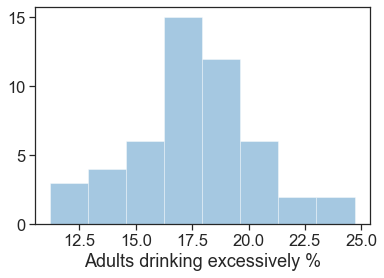

Data is Gaussian, p =0.709


In [33]:
#ALCOHOL CONSUMPTION

#create a function for the test
def sharp_stat(x):
    alpha = 0.05
    stat, p = shapiro(x)
    if p >alpha:
        print('Data is Gaussian, p =%.3f' %(p))       #adapted from plotly
    else:
        print('Data is not Guassian, p =%.3f' %(p))

#Histogram to visualise distribution
sns.set_style('ticks')
sns.distplot(df['Adults drinking excessively %'],kde = False)
plt.show()

sharp_stat(df['Adults drinking excessively %'])

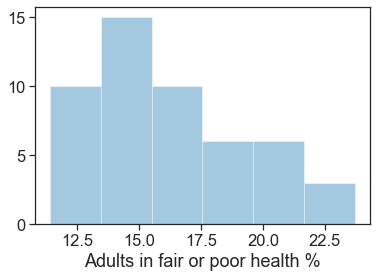

Raw:
Data is not Guassian, p =0.042
Log:
Data is Gaussian, p =0.323


In [34]:
#Now for adults in poor or fair health
df['Adults in fair or poor health %'] = df['Adults in fair or poor health %'].astype(float) #string into float values

#histogram to visualise 
sns.set_style('ticks')
sns.distplot(df['Adults in fair or poor health %'],kde = False)
plt.show()


print('Raw:')
sharp_stat(df['Adults in fair or poor health %'])


#p value is <0.05 therefore the data needs to be transformed
log_health = np.log(df['Adults in fair or poor health %'])

print('Log:') 
(sharp_stat(log_health))

#new df containing the log values for ANOVA
log_df = df.copy()
log_df['Log Health'] = log_health
#remove un-needed columns 
log_df = log_df.drop(['Alcohol-related driving deaths %', 'Adults in fair or poor health %'], axis=1)

In [35]:
#ALCOHOL RELATED DEATHS
#In assignment one, the alcohol related deaths data had a skewed distribution. Now we can test whether it is Gaussian
#using the Shapiro- wilk test.
sharp_stat(aa_df['Deaths per 100,000 (2017)'])

#To confirm the skewness and kurtosis visualised in the histogram
ard_s = skew(aa_df['Deaths per 100,000 (2017)'])
ard_k = kurtosis(aa_df['Deaths per 100,000 (2017)'])
print ('Skewness :', ard_s,'\n' 'Kurtosis:', ard_k)

Data is not Guassian, p =0.000
Skewness : 1.4082291909483218 
Kurtosis: 2.1898762343189464


In [36]:
#Since data is not Gaussian, it can be log transformed and run through the test again.
log_adeath = np.log(aa_df['Deaths per 100,000 (2017)'])
#re-test the log values
sharp_stat(log_adeath)
print(('Skewness:'), skew(log_adeath),'\n',('Kurtosis:'),kurtosis(log_adeath))

#new df containing log values
log_aa = aa_df.copy()
log_aa['Log Deaths 2017'] = log_adeath  
log_aa = log_aa.drop('Deaths per 100,000 (2017)', axis=1)    #axis not needed for analysis 
#log_aa

Data is Gaussian, p =0.207
Skewness: 0.48251969801803346 
 Kurtosis: -0.286222388169755


In [37]:
#LIVER DATA 
#lots of data here so instead of doing many histograms, the same stastical test will be conducted and presented 
#alongside the skewness and kurtosis values in place of the visual.

#commas in the columns to represent the thousands have been replaced by a space 
liv_df.iloc[:,5] = liv_df.iloc[:,5].str.replace(",","")
liv_df.iloc[:,6] = liv_df.iloc[:,6].str.replace(",","")
liv_df.iloc[:,7] = liv_df.iloc[:,7].str.replace(",","")
liv_df.iloc[:,8] = liv_df.iloc[:,8].str.replace(",","")
liv_df.iloc[:,9] = liv_df.iloc[:,9].str.replace(",","")

liv_df = liv_df.astype(int)   #make sure all columns are int not string

for (column, data) in liv_df.iteritems():
    sharp_stat(data)

Data is not Guassian, p =0.002
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000
Data is not Guassian, p =0.000


In [38]:
#As all of the columns are not Guassian, all will be log transformed
liv_log = np.log(liv_df.astype('float'))

#Iterate over the columns now and see if the transformation has been successful
for (column, data) in liv_log.iteritems():
    print(column)
    sharp_stat(data)
    k = kurtosis(data)
    s = skew(data)
    print('K = %.3f' %(k),'\n','S = %.3f' %(s), '\n')
    
#although the first column is not Guassian, this is not a big issue as this is 2005 data, which will not be used in 
#any ANOVA. 

('Rate of death (per 100,000)', 2005)
Data is not Guassian, p =0.010
K = -0.632 
 S = 0.334 

('Rate of death (per 100,000)', 2014)
Data is Gaussian, p =0.132
K = 0.472 
 S = 0.427 

('Rate of death (per 100,000)', 2015)
Data is Gaussian, p =0.284
K = 0.386 
 S = 0.363 

('Rate of death (per 100,000)', 2016)
Data is Gaussian, p =0.085
K = 1.098 
 S = 0.440 

('Rate of death (per 100,000)', 2017)
Data is Gaussian, p =0.110
K = 1.126 
 S = 0.608 

('Total Deaths', 2005)
Data is Gaussian, p =0.508
K = -0.452 
 S = 0.048 

('Total Deaths', 2014)
Data is Gaussian, p =0.417
K = -0.393 
 S = -0.038 

('Total Deaths', 2015)
Data is Gaussian, p =0.415
K = -0.375 
 S = 0.050 

('Total Deaths', 2016)
Data is Gaussian, p =0.395
K = -0.408 
 S = 0.016 

('Total Deaths', 2017)
Data is Gaussian, p =0.435
K = -0.422 
 S = -0.012 



### 3.2) The impact of the legality of cannabis on alcohol consumption, alcohol related deaths and liver cirrhosis.

In [39]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#### Alcohol consumption 2015.

In [40]:
#Merge the new wiki data (all_wdf) with the new log data for analysis.
#for correct merging the table needs to be sorted by state
log_df = log_df.sort_values(by='States').reset_index(drop = True)

#Joining the columns required from the Wiki data
log_df = log_df.join(all_wdf['Rec Code'] ,how ='left')
log_df = log_df.join(all_wdf['Decrim'] ,how ='left')
log_df = log_df.join(all_wdf['Legalised'] ,how ='left')

#Now to drop the states that are before 2015 for the ANOVA, as this data is from 2015.
log_df = log_df[(log_df.Decrim<2015) &(log_df.Legalised <2015)]
log_df = log_df.sort_values(by = 'Rec Code').reset_index(drop = True)
log_df

,States,Adults drinking excessively %,Log Health,Rec Code,Decrim,Legalised
0,. Rhode Island,17.9,2.760010,D,2012,0
1,. Connecticut,18.6,2.660260,D,2011,0
2,. Ohio,19.2,2.727853,D,1975,0
3,. North Carolina,14.9,2.917771,D,1977,0
4,. New York,18.2,2.785011,D,1977,0
5,. Missouri,17.7,2.809403,D,2014,0
6,. Maryland,15.5,2.587764,D,2014,0
7,. Minnesota,21.1,2.476538,D,1976,0
8,. Alabama,13.0,3.054001,IL,0,0
9,. Texas,17.3,2.960105,IL,0,0


,Adults drinking excessively %,Log Health,Decrim,Legalised
Rec Code,,,,
D,17.887500,2.715576,1994.5000,0.0
IL,17.275000,2.861057,247.1875,0.0
L,19.450000,2.700488,987.0000,2013.0
M,16.222222,2.798597,0.0000,0.0


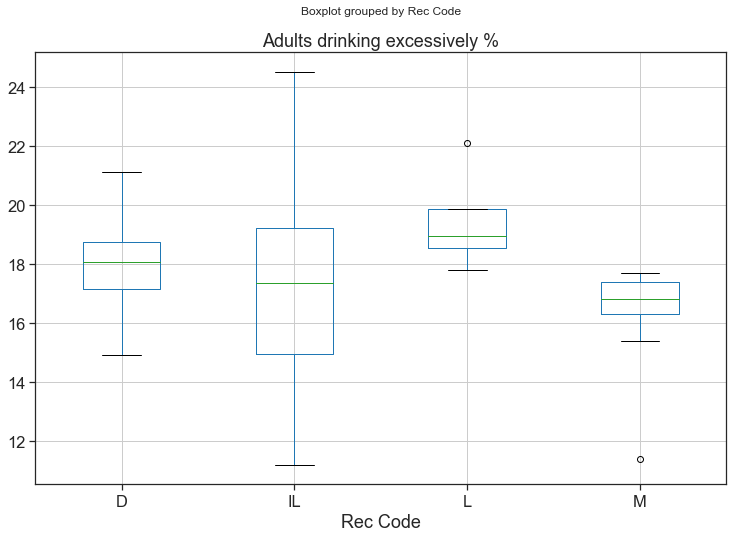

In [41]:
#We can visualise some preliminary descriptives of each group.
#Boxplots represent this data very nicely, we can see the differences in mean, plus the max and min values
log_df.boxplot('Adults drinking excessively %', by='Rec Code', figsize=(12, 8))
log_df.groupby(['Rec Code']).mean()

In [42]:
#Levenes test for equal variance- a second assumption that must be met before an ANOVA. 
# if the p value is greater than 0.05 we assume equal variance and proceed. 

drink_l = stats.levene(log_df['Adults drinking excessively %'][log_df['Rec Code']== 'L'],
              log_df['Adults drinking excessively %'][log_df['Rec Code']== 'D'],
              log_df['Adults drinking excessively %'][log_df['Rec Code']== 'IL'],
              log_df['Adults drinking excessively %'][log_df['Rec Code']== 'M'])

health_l = stats.levene(log_df['Log Health'][log_df['Rec Code']== 'L'],
              log_df['Log Health'][log_df['Rec Code']== 'D'],
              log_df['Log Health'][log_df['Rec Code']== 'IL'],
              log_df['Log Health'][log_df['Rec Code']== 'M'])

#ANOVA between the 4 recreational groups 
con_stats = stats.f_oneway(log_df['Adults drinking excessively %'][log_df['Rec Code']== 'L'],
              log_df['Adults drinking excessively %'][log_df['Rec Code']== 'D'],
              log_df['Adults drinking excessively %'][log_df['Rec Code']== 'IL'],
              log_df['Adults drinking excessively %'][log_df['Rec Code']== 'M'])

health_stats = stats.f_oneway(log_df['Log Health'][log_df['Rec Code']== 'L'],
              log_df['Log Health'][log_df['Rec Code']== 'D'],
              log_df['Log Health'][log_df['Rec Code']== 'IL'],
              log_df['Log Health'][log_df['Rec Code']== 'M'])

print('Excess Drinking Levene:', drink_l, '\n',
     'Excess Drinking:', con_stats, '\n', '\n',
     'Health Levene:', health_l, '\n',
     'Health:', health_stats)

#no significance 

Excess Drinking Levene: LeveneResult(statistic=1.9131160959780482, pvalue=0.14664939386168638) 
 Excess Drinking: F_onewayResult(statistic=1.354891400267862, pvalue=0.27359335563813386) 
 
 Health Levene: LeveneResult(statistic=0.9895261160069255, pvalue=0.4097324265341682) 
 Health: F_onewayResult(statistic=1.5604446404265468, pvalue=0.21748036175134622)


Different legal statuses of cannabis did not change the percentage of adults drinking excessively, nor did it impact the percentage of adults in fair or poor health. 

#### Rate of alcohol-related deaths 2017.

In [43]:
#Alcohol related deaths data and the completed wikipedia table (all_wdf) can be merged for analysis.
m_a_log = pd.merge(log_aa, all_wdf, left_index=True, right_index=True)
m_a_log = m_a_log.drop(['State_y', 'Legal status', 'Recreational'],axis = 1)

#The states that did not have law changes by 2017 need to be eliminated, as this data is from 2017.
m_a_log = m_a_log[(m_a_log.Decrim <2017) & (m_a_log.Legalised < 2017)]
m_a_log = m_a_log.sort_values(['Rec Code']).reset_index(drop=True)
#m_a_log

In [44]:
#Levenes test of equal variance -  a second assumption that must be met before an ANOVA. 
# if the p value is greater than 0.05 we assume equal variance and proceed. 
stats.levene(m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'L'],
              m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'D'],
              m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'IL'],
              m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'M'])

LeveneResult(statistic=2.49103600529262, pvalue=0.07482958094264014)

,Log Deaths 2017,Decrim,Legalised
Rec Code,,,
D,2.262200,1996.777778,0.0
IL,2.363092,247.187500,0.0
L,2.767084,1488.375000,2014.5
M,2.577644,0.000000,0.0


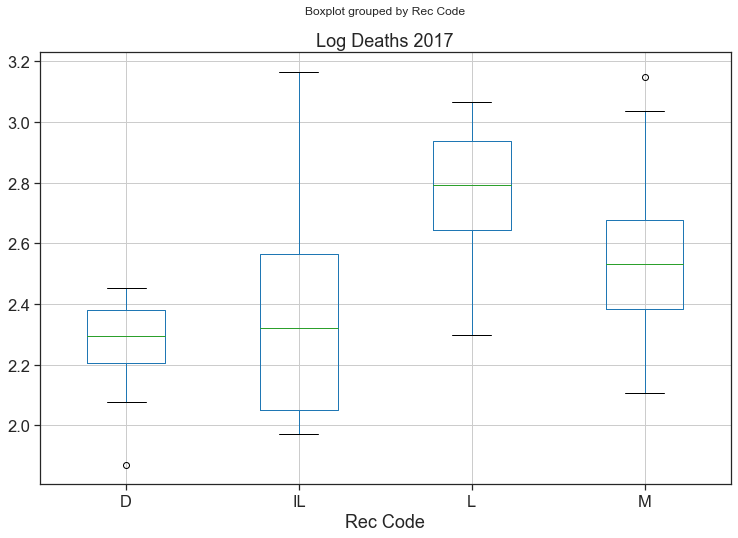

In [45]:
#Group descriptives to get a sense of our data 
m_a_log.boxplot('Log Deaths 2017', by='Rec Code', figsize=(12, 8))
m_a_log.groupby(['Rec Code']).mean()

#m_a_log.groupby(['Rec Code']).describe()     #alternatively to see mean, std, max and min

F_onewayResult(statistic=4.7463128134597925, pvalue=0.006585095677688729) 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     D     IL   0.1009 0.8503 -0.2477 0.4494  False
     D      L   0.5049 0.0099  0.0984 0.9114   True
     D      M   0.3154 0.1564 -0.0789 0.7098  False
    IL      L    0.404 0.0238  0.0418 0.7662   True
    IL      M   0.2146 0.3625  -0.134 0.5631  False
     L      M  -0.1894 0.5882 -0.5959  0.217  False
---------------------------------------------------


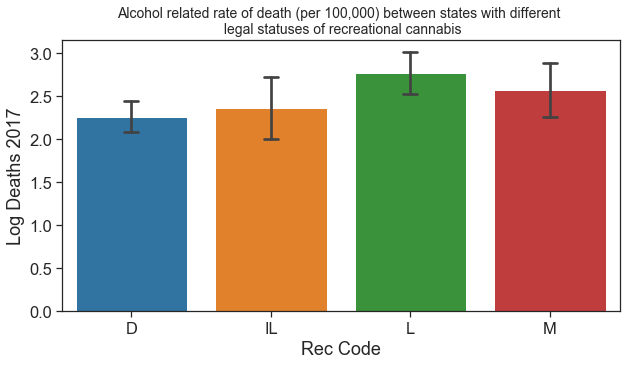

In [46]:
#Running an ANOVA
#here if p<0.05 it is a significant result 
an_2 = stats.f_oneway(m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'L'],
              m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'D'],
              m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'IL'],
              m_a_log['Log Deaths 2017'][m_a_log['Rec Code']== 'M'])

#the ANOVA model is significant, now we can see which groups differ.
mc2 = MultiComparison(m_a_log['Log Deaths 2017'],m_a_log['Rec Code'])
result2 = mc2.tukeyhsd()

print(an_2, '\n\n', result2)

#we reject the null hypothesis for D v L and IL v L.

#These differences can be visualised on a bar graph.
fig, ax = plt.subplots(figsize=(10,5))
death_g = sns.barplot(y = 'Log Deaths 2017' , x= 'Rec Code', 
           hue = 'Rec Code', data = m_a_log , ci='sd', capsize = 0.1, dodge= False)

#The legend is the same as the x axis titles
death_g.get_legend().set_visible(False)
death_g.set_title('Alcohol related rate of death (per 100,000) between states with different \n legal statuses of recreational cannabis'
                 , fontsize = 14)

plt.show()

States with legal recreational cannabis had significantly higher deaths per 100,000 compared to decriminalised _(p= 0.0099)_ and illegal states _(p = 0.0238)_ , with legal states having nearly double the rate of death compared to decriminalised states, and a rate 1.5 times higher than illegal states. 

#### Liver disease / cirrhosis 2015-2017.

In [47]:
#the states in the liver dataframe are in alphabetical order of the abbreviated state names rather than full state name 
#Therefore the states are not labelled the same or in the same order as the wiki data so cannot be merged
#on index or state. 

#from the original website
statesliver=['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado',
         'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 
         'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 
         'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 
         'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 
         'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
         'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']

#Omitted Total Deaths from analysis : picked up in the discussion.

In [48]:
#Rate of death
#Seperate master df to access the data more easily
r_liv = pd.DataFrame(liv_log.loc[: , ('Rate of death (per 100,000)')])
r_liv['State'] = statesliver
r_liv = r_liv.sort_values(by = 'State').reset_index(drop = True)
r_liv = r_liv.merge(all_wdf['Rec Code'], left_index=True, right_index=True)
r_liv = r_liv.merge(all_wdf['Decrim'] ,left_index=True, right_index=True)
r_liv = r_liv.join(all_wdf['Legalised'])
#r_liv

In [49]:
#From the master dataframe, time to seperate out the different years for analysis, and apply the appropriate filters
#for ANOVA. Pre - 2014 was not compared as only two states would be in the legal group, this is bad practise in ANOVA
#as the smallest grouop size should always be equal or greater than the number of compared groups. 

#2015
st_2015=r_liv[(r_liv.Decrim <2015) & (r_liv.Legalised < 2015)]
st_2015 = st_2015.reset_index()

#2016
st_2016=r_liv[(r_liv.Decrim <2016) & (r_liv.Legalised < 2016)]
st_2016 = st_2016.reset_index()

#2017
st_2017=r_liv[(r_liv.Decrim <2017) & (r_liv.Legalised < 2017)]
st_2017 = st_2017.reset_index()


In [50]:
#assumptions of an ANOVA also include equal variance between groups. If the resulting p value is greater than 0.05,
#the test is not significant and we assume equal variance 
l_2015 = stats.levene(st_2015[2015][st_2015['Rec Code']== 'L'],
              st_2015[2015][st_2015['Rec Code']== 'D'],
              st_2015[2015][st_2015['Rec Code']== 'IL'],
              st_2015[2015][st_2015['Rec Code']== 'M'])

l_2016 = stats.levene(st_2016[2016][st_2016['Rec Code']== 'L'],
              st_2016[2016][st_2016['Rec Code']== 'D'],
              st_2016[2016][st_2016['Rec Code']== 'IL'],
              st_2016[2016][st_2016['Rec Code']== 'M'])

l_2017 = stats.levene(st_2017[2017][st_2017['Rec Code']== 'L'],
              st_2017[2017][st_2017['Rec Code']== 'D'],
              st_2017[2017][st_2017['Rec Code']== 'IL'],
              st_2017[2017][st_2017['Rec Code']== 'M'])

print ('2015:',l_2015, '\n\n', '2016:',l_2016, '\n\n', '2017:',l_2017)

#All the values are >0.05 so we can proceed with the ANOVA. 

2015: LeveneResult(statistic=0.9421837308598896, pvalue=0.43141332961028156) 

 2016: LeveneResult(statistic=0.5398834967864216, pvalue=0.6582219144638352) 

 2017: LeveneResult(statistic=0.5102817732525518, pvalue=0.6775970587852781)


,count,mean,std,min,25%,50%,75%,max
Rec Code,,,,,,,,
D,8.0,2.105923,0.214863,1.791759,2.007521,2.138333,2.302585,2.302585
IL,16.0,2.346515,0.248959,1.945910,2.167779,2.397895,2.504917,2.708050
L,4.0,2.560703,0.105229,2.484907,2.484907,2.524928,2.600725,2.708050
M,9.0,2.505454,0.234579,2.197225,2.397895,2.484907,2.639057,2.890372


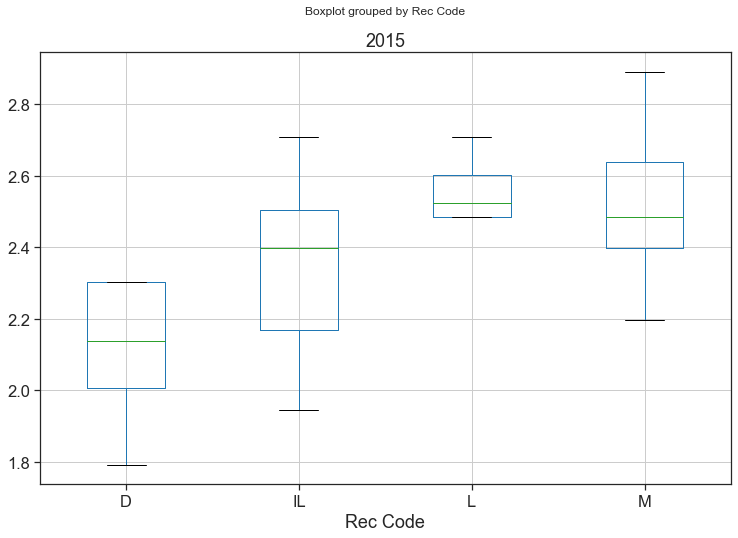

In [51]:
#Some basic descriptives of the data.
st_2015.boxplot(2015, by='Rec Code', figsize=(12, 8))
st_2015.groupby('Rec Code')[2015].describe()

,count,mean,std,min,25%,50%,75%,max
Rec Code,,,,,,,,
D,9.0,2.111821,0.224349,1.791759,1.945910,2.197225,2.302585,2.397895
IL,16.0,2.353939,0.213502,1.945910,2.197225,2.397895,2.564949,2.639057
L,4.0,2.535074,0.163569,2.397895,2.463154,2.484907,2.556827,2.772589
M,9.0,2.410535,0.194555,2.197225,2.197225,2.397895,2.484907,2.772589


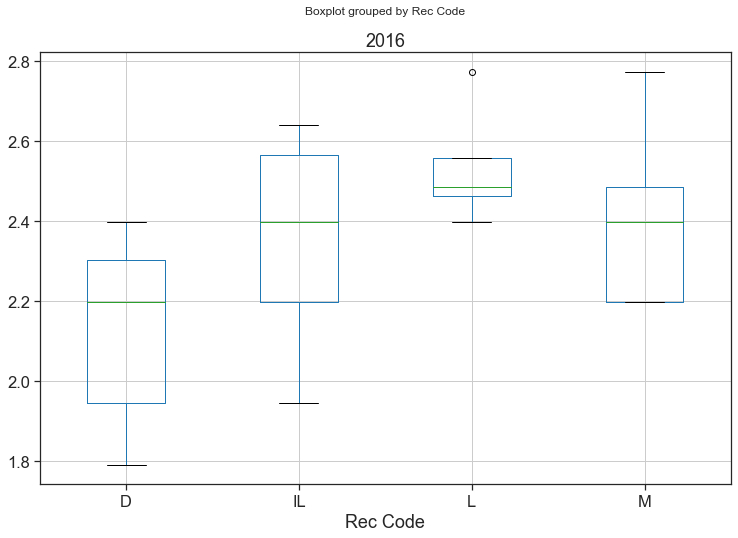

In [52]:
st_2016.boxplot(2016, by='Rec Code', figsize=(12, 8))
st_2016.groupby('Rec Code')[2016].describe()

,count,mean,std,min,25%,50%,75%,max
Rec Code,,,,,,,,
D,9.0,2.154375,0.203230,1.791759,2.079442,2.197225,2.302585,2.397895
IL,16.0,2.378249,0.233103,1.945910,2.197225,2.397895,2.504917,2.772589
L,8.0,2.472447,0.169997,2.197225,2.374068,2.484907,2.583476,2.708050
M,9.0,2.472902,0.218027,2.197225,2.302585,2.484907,2.639057,2.833213


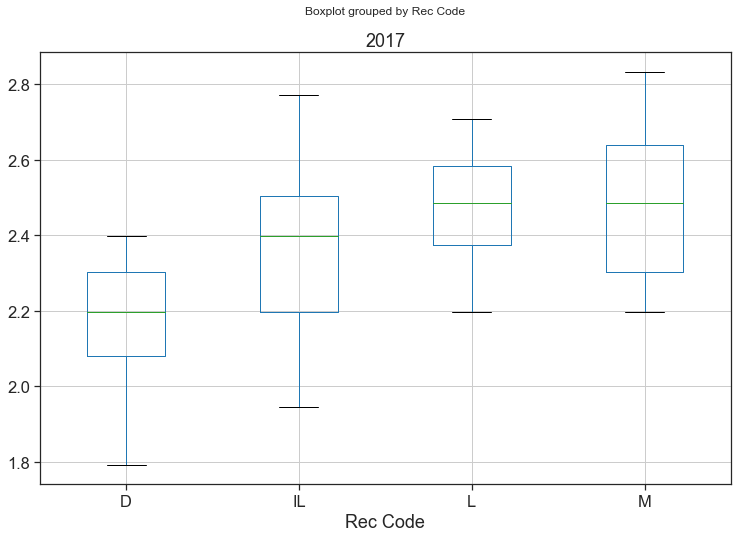

In [53]:
st_2017.boxplot(2017, by='Rec Code', figsize=(12, 8))
st_2017.groupby('Rec Code')[2017].describe()

2015 ANOVA: F_onewayResult(statistic=5.546070523266101, pvalue=0.0033952795629027827) 
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     D     IL   0.2406 0.0911 -0.0273 0.5085  False
     D      L   0.4548 0.0136  0.0759 0.8336   True
     D      M   0.3995 0.0055  0.0989 0.7001   True
    IL      L   0.2142  0.353 -0.1317   0.56  False
    IL      M   0.1589 0.3569 -0.0988 0.4167  False
     L      M  -0.0552    0.9  -0.427 0.3165  False
---------------------------------------------------


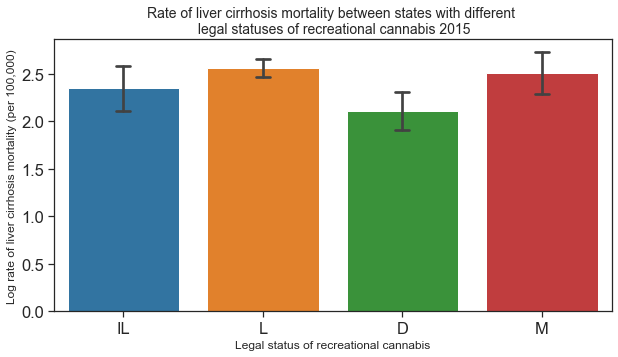

2016 ANOVA: F_onewayResult(statistic=5.122247935183911, pvalue=0.004954929706328459) 
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     D     IL   0.2421 0.0403  0.0082 0.4761   True
     D      L   0.4233 0.0093  0.0858 0.7607   True
     D      M   0.2987  0.022   0.034 0.5634   True
    IL      L   0.1811 0.4165 -0.1327  0.495  False
    IL      M   0.0566    0.9 -0.1774 0.2905  False
     L      M  -0.1245 0.7297 -0.4619 0.2129  False
---------------------------------------------------


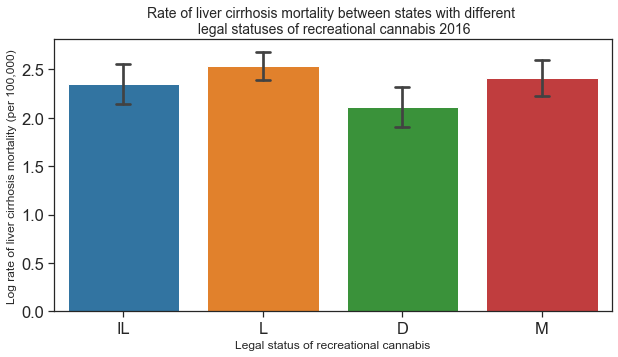

2017 ANOVA: F_onewayResult(statistic=4.388488736657893, pvalue=0.009535983380218452) 
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     D     IL   0.2239  0.073 -0.0148 0.4626  False
     D      L   0.3181 0.0198  0.0397 0.5965   True
     D      M   0.3185 0.0153  0.0485 0.5886   True
    IL      L   0.0942 0.7164 -0.1539 0.3423  False
    IL      M   0.0947 0.6914 -0.1441 0.3334  False
     L      M   0.0005    0.9 -0.2779 0.2788  False
---------------------------------------------------


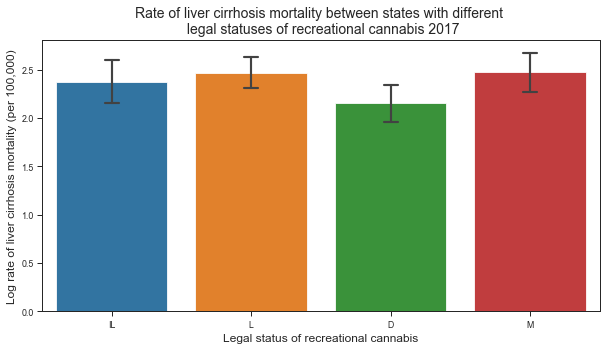

In [54]:
#The two main assumptions are met so an ANOVA can now be run between the different legal groups. 

an_2015 = stats.f_oneway(st_2015[2015][st_2015['Rec Code']== 'L'],
              st_2015[2015][st_2015['Rec Code']== 'D'],
              st_2015[2015][st_2015['Rec Code']== 'IL'],
              st_2015[2015][st_2015['Rec Code']== 'M'])

an_2016 = stats.f_oneway(st_2016[2016][st_2016['Rec Code']== 'L'],
              st_2016[2016][st_2016['Rec Code']== 'D'],
              st_2016[2016][st_2016['Rec Code']== 'IL'],
              st_2016[2016][st_2016['Rec Code']== 'M'])

an_2017 = stats.f_oneway(st_2017[2017][st_2017['Rec Code']== 'L'],
              st_2017[2017][st_2017['Rec Code']== 'D'],
              st_2017[2017][st_2017['Rec Code']== 'IL'],
              st_2017[2017][st_2017['Rec Code']== 'M'])

#Tukey's Post Hoc test

mc2015 = MultiComparison(st_2015[2015],st_2015['Rec Code'])
result2015 = mc2015.tukeyhsd()

mc2016 = MultiComparison(st_2016[2016],st_2016['Rec Code'])
result2016 = mc2016.tukeyhsd()

mc2017 = MultiComparison(st_2017[2017],st_2017['Rec Code'])
result2017 = mc2017.tukeyhsd()

#Now we can show the results of the post hoc alongside graphical representation of the data.

print('2015 ANOVA:',an_2015, '\n' ,result2015)
#Graph for 2015
fig, ax = plt.subplots(figsize=(10,5))
graph_15 = sns.barplot(y = 2015 , x= 'Rec Code', 
          data = st_2015, ci='sd', capsize = 0.1, dodge= False )
graph_15.set_title('Rate of liver cirrhosis mortality between states with different \n legal statuses of recreational cannabis 2015'
    , fontsize = 14)
graph_15.set_xlabel('Legal status of recreational cannabis', fontsize = 12)
graph_15.set_ylabel('Log rate of liver cirrhosis mortality (per 100,000)', fontsize = 12)
plt.show()

print('2016 ANOVA:', an_2016, '\n', result2016)

#Graph for 2016
fig, ax = plt.subplots(figsize=(10,5))
graph_16 = sns.barplot(y = 2016 , x= 'Rec Code', 
          data = st_2016, ci='sd', capsize = 0.1, dodge= False )
graph_16.set_title('Rate of liver cirrhosis mortality between states with different \n legal statuses of recreational cannabis 2016'
              , fontsize = 14)
graph_16.set_xlabel('Legal status of recreational cannabis', fontsize = 12)
graph_16.set_ylabel('Log rate of liver cirrhosis mortality (per 100,000)', fontsize = 12)
plt.show()

print('2017 ANOVA:', an_2017, '\n', result2017)

#Graph for 2017 
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(10,5))
graph_17 = sns.barplot(y = 2017 , x= 'Rec Code', 
          data = st_2017, ci='sd', capsize = 0.1, dodge= False )
graph_17.set_title('Rate of liver cirrhosis mortality between states with different \n legal statuses of recreational cannabis 2017'
              , fontsize = 14)
graph_17.set_xlabel('Legal status of recreational cannabis', fontsize = 12)
graph_17.set_ylabel('Log rate of liver cirrhosis mortality (per 100,000)', fontsize = 12)
plt.show()

In 2015, decriminalised states had significantly lower rates of liver cirrhosis per 100,000 than legal and misdemeanour states(_p = 0.0182, p=0.0079_ respectively). 

In 2016, decriminalised states were also significantly lower in rate than all three other legal groups (Illegal _p = 0.044 ;_ Legal _p = 0.0143_ ; Misdemeanour _p = 0.0209_ ). 

In 2017, the rate of liver cirrohsis mortality in decriminalised states were once again significantly lower than legal (_p = 0.0218_ ) and misdemeanour(_p = 0.0124_ ) states.

### 3.3) Longitudinal trends in liver cirrhosis.
Two states have had recreationally legal cannabis from 2012: Washington and Colorado. Below are visulisations of the change over time in log rate of death per 100,000 to see if there are any superficial trends. 

In addition, the rate of liver cirrhosis mortality over time of decriminalised states has also been displayed.

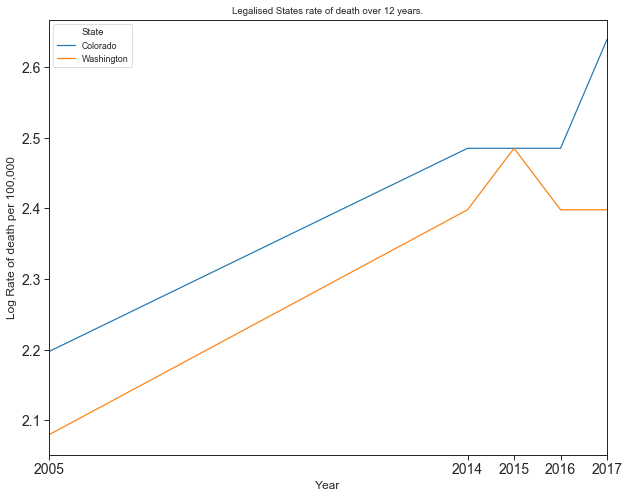

In [55]:
#change over time for legalised states
l_g = r_liv[(r_liv.Legalised <2014) & (r_liv.Legalised >0)]
l_g = l_g.drop(['Rec Code', 'Legalised', 'Decrim'], axis = 1)
l_g = l_g.set_index('State')
t_l_g = l_g.transpose()   #to make years the index

t_l_g.index = t_l_g.index.astype(int)  
legal_t = t_l_g.plot(kind='line', title= 'Legalised States rate of death over 12 years.', 
                                 legend=True, fontsize=14,figsize=(10,8))
legal_t.set_xlabel('Year', fontsize = 12)
legal_t.set_ylabel('Log Rate of death per 100,000', fontsize = 12)
legal_t.set_xticks(t_l_g.index)
plt.show()

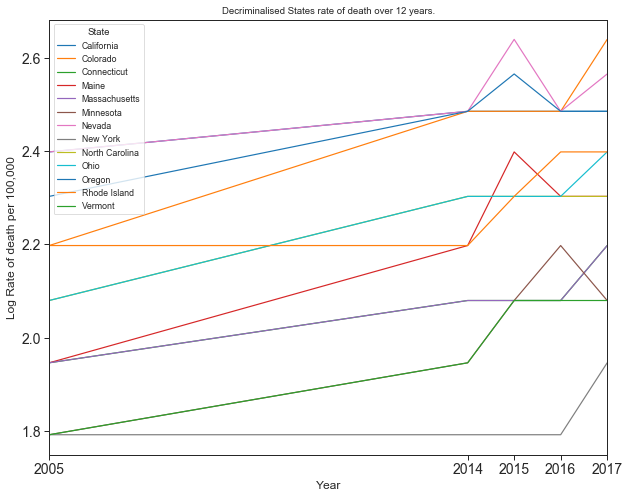

In [56]:
#change over time for states that are decriminalised 
d_g = r_liv[(r_liv.Decrim <2014) & (r_liv.Decrim >0) & (r_liv['Rec Code'] != 'IL')]
d_g = d_g.drop(['Rec Code', 'Legalised', 'Decrim'], axis = 1)
d_g = d_g.set_index('State')
t_d_g = d_g.transpose()
t_d_g.index = t_d_g.index.astype(int)
decrim_t = t_d_g.plot(kind='line', title= 'Decriminalised States rate of death over 12 years.', 
                                 legend=True, fontsize=14,figsize=(10,8))
decrim_t.set_xlabel('Year', fontsize = 12)
decrim_t.set_ylabel('Log Rate of death per 100,000', fontsize = 12)
decrim_t.set_xticks(t_d_g.index)
plt.show()

The death rate of liver cirrhosis for legalised states shows a general upward trend. Furthermore, states that have had cannabis decriminalised before 2014 show more varied patterns, however most appear to show an upward rise.

## 4) Discussion.

### 4.1) Legality of cannabis has no effect on alcohol consumption.
No differences in the percentage of excessive drinking were found between states with different legal statuses of cannabis. This suggests that the legalisation of recreational cannabis does not influence overall consumption of alcohol. The main caveat of this dataset is that it only shows the percentage of excessive drinking, not consumption overall. Elfein (2019) calculated that in America the consumption of alcohol per person has increased over the last 20 years. Analysis would be improved if units consumed per state could be measured reliably. 

### 4.2) Decriminalised states had the lowest rate of alcohol related deaths and liver cirrhosis mortality compared to legal states. 
As mentioned previously, the difference between alcohol related deaths from River Oak's website and the liver cirrhosis mortality data is the specificity in what they measure. Rate of alcohol related deaths is more general than cirrhosis data, whilst there is undoubtably overlap between the two measures, the combination gives both a broad and a more detailed perspective of the research question.

Interestingly, for both general alcohol related deaths and deaths caused by liver cirrhosis, decriminalised states had significantly lower rates than legalised states. The number of alcohol related deaths (per 100,000) was nearly double in legal states than decriminalised. A possible explanation is the length of time for which states have been decriminalised and legalised respectively. Moreover, the average year of decriminalisation is around 1996 whereas legalisation is around 2014. Implying that more time is needed before effects can be detected. However, this theory does not explain why legalised states had the highest alcohol related death rate overall.

Statistical analysis was not conducted on total deaths per state for liver cirrhosis mortality due to this data being less comparable between states than the rate of death per 100,000. Therefore, discussion of liver cirrhosis data is referring to the rate of death per 100,000. 

Deaths caused by liver cirrhosis was the lowest in decriminalised states for every year analysed (2015-2017), with legal states having the highest mean in 2015 and 2016. This is a similar outcome to alcohol related deaths and supports that something interesting is happening in states that have decriminalised cannabis, but not those that have fully legalised. It could be theorised that states which have lifted harsher penalties for cannabis possession, for longer, allow for increased cannabis use. This is turn, when combined with alcohol consumption, produces an internal protection to the effects of alcohol on the liver, therefore decreasing the manifestation of liver disease. From the limited literature surrounding liver disease/cirrhosis and cannabis, the consensus is unanimous: the endocannabinoid system, activated by cannabinoids in cannabis provides a protective mechanism in the liver (Adejumo et al., 2018; Dibba et al., 2018). This pathway has been shown to have possible therapeutic benefits in patients with cirrhosis (Dibba et al., 2018) and decrease the risk of alcoholic liver disease (Adejumo et al., 2018).  Critiques of these studies also apply here, such as the inability to regulate the type of cannabis being smoked and the impossibility of acquiring honest data surrounding the usage of cannabis per state. Both of which may lead to skewed results in this study and may partially account for the results of legal states. 

### 4.3) States with legal recreational cannabis since 2012 show upwards trends in liver cirrhosis mortality. 
Although statistical significance has not been calculated due to the number of datapoints per state, a general increase of liver cirrhosis in all states shown could be seen. From this we can infer that the prevalence of liver disease is still rising, even in states that legalised or decriminalised cannabis before 2012/2014 respectively. Detailed analysis by Tapper & Parikh (2018) found a significant increase in mortality due to cirrhosis, including alcoholic cirrhosis, between 1999 and 2016; agreeing with the inferred findings. It is important to note that the data used in this research was not alcohol specific cirrhosis, however the most common cause of liver cirrhosis is alcohol (NHS, 2017).

An important assumption in this research is that those who drink also smoke cannabis regularly, furthermore those who smoke regularly need to smoke cannabis with high CBD content; for cannabis to be physiologically relevant. Without this combination it is unlikely that an effect on alcohol related disease would be found. As previously discussed, the strain of cannabis and the frequency of cannabis use cannot be stated, therefore even though the mortality due to liver cirrhosis is increasing, the relationship of this to cannabis use across these years is unknown. This information would give a holistic understanding of the relationship between the two trends. Additionally, there is a 9 year gap in data between 2005 and 2014, therefore we cannot see the peaks and troughs between these years which would also provide more insight into the patterns of this data. However, the NIH (2016) reported an increase in death rate from liver cirrhosis between 2000 -2013, agreeing with the conclusion that the rate of death from liver cirrhosis is on the rise.

### 4.4) Concluding remarks.
The hypothesis tested is relatively narrow for interpretation. The legality of cannabis cannot simply be categorised as legal or illegal, as there are other legal statuses that are equally valid. For that reason, sample size of the legal group was much smaller when data pre-2016 was analysed. It would be interesting to test the same hypothesis again in a decades time, allowing sample sizes to equalise and allowing time for new laws to be accepted and implemented. Another research focus testing between states that have legal medical cannabis against those that do not would also be relevant. As previously mentioned, studies suggest that CBD protects the liver against damage from alcohol. Therefore, due to the regularisation of medicinal cannabis, comparing between states with legal and illegal medicinal cannabis should have more readily detectable differences in alcohol related disease prevalence; if the discussed biological mechanism is the main driving factor. 

From these results the legalisation of recreational cannabis does not decrease alcohol related disease by decreasing alcohol consumption. Alcohol consumption per person has steadily increased over the last two decades, a huge factor in the upward trend seen in liver disease mortality rates in this study. It cannot be conclusively stated whether legalising recreational cannabis decreases alcohol related disease via biological mechanisms. In this study only the states with decriminalised cannabis showed a decrease in alcohol related death and liver cirrhosis mortality rate, however decriminalising cannabis is one step closer to full legalisation. There are many other aspects influencing the results of this research such as political and social views of cannabis and alcohol use – aspects that have not been fully discussed in this study. 

## References. 
    
            Adejumo, A.C., Ajayi, T.O., Adegbala, O.M., Adejumo, K.L., Alliu, S., Akinjero, A.M., Onyeakusi, N.E., Ojelabi, O. and Bukong, T.N. (2018). Cannabis use is associated with reduced prevalence of progressive stages of alcoholic liver disease. Liver International, [online] 38(8), pp.1475–1486. Available at: https://onlinelibrary.wiley.com/doi/abs/10.1111/liv.13696 [Accessed 27 Nov. 2019].
    
            Andrews, C.N., Devlin, S.M., Le Foll, B., Fischer, B., Tse, F., Storr, M. and Congly, S.E. (2018). Canadian Association of Gastroenterology Position Statement: Use of Cannabis in Gastroenterological and Hepatic Disorders. Journal of the Canadian Association of Gastroenterology, [online] 2(1), pp.37–43. Available at: https://academic.oup.com/jcag/article/2/1/37/5166404 [Accessed 4 Jan. 2020].
    
            Buckingham, C. (2018). America’s Drunkest States. [online] 247wallst.com. Available at: https://247wallst.com/special-report/2018/03/07/americas-drunkest-states/12/ [Accessed 27 Nov. 2019].
    
             Cadena, A. (2018). CBD vs THC: The Difference Explained. [online] Medium. Available at: https://medium.com/cbd-origin/cbd-vs-thc-the-difference-explained-b3cfc1da52f0 [Accessed 5 Jan. 2020].
     
            CDC. (2019). Stats of the States - Chronic Liver Disease/Cirrhosis. [online] Available at: https://www.cdc.gov/nchs/pressroom/sosmap/liver_disease_mortality/liver_disease.htm [Accessed 24 Nov. 2019]. 
    
             Dibba, P., Li, A., Cholankeril, G., Iqbal, U., Gadiparthi, C., Khan, M., Kim, D. and Ahmed, A. (2018). The Role of Cannabinoids in the Setting of Cirrhosis. Medicines, [online] 5(2), p.52. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6023500/?otool=igbumllib [Accessed 4 Jan. 2020].
     
            Elflein, J. (2016). Total alcohol consumption per capita U.S. 1850-2016 | Statistic. [online] Statista. Available at: https://www.statista.com/statistics/442818/per-capita-alcohol-consumption-of-all-beverages-in-the-us/ [Accessed 4 Jan. 2020].
    
            Freeman, T.P., Hindocha, C., Green, S.F. and Bloomfield, M.A.P. (2019). Medicinal use of cannabis based products and cannabinoids. BMJ, p.l1141.
    
            Grinspoon, P. (2018). Cannabidiol (CBD) — what we know and what we don’t - Harvard Health Blog. [online] Harvard Health Blog. Available at: https://www.health.harvard.edu/blog/cannabidiol-cbd-what-we-know-and-what-we-dont-2018082414476 [Accessed 20 Nov. 2019]. 
    
            Kochanek, K., Murphy, S., Xu, J. and Arias, E. (2019). National Vital Statistics Reports Deaths: Final Data for 2017. [online] Available at: https://www.cdc.gov/nchs/data/nvsr/nvsr68/nvsr68_09-508.pdf [Accessed 21 Nov. 2019]. 
    
            Melamede, R. (2005). Cannabis and tobacco smoke are not equally carcinogenic. Harm Reduction Journal, [online] 2(1), p.21. Available at: https://harmreductionjournal.biomedcentral.com/articles/10.1186/1477-7517-2-21 [Accessed 15 Oct. 2019].
    
            NHS Choices (2017). Overview Cirrhosis. [online] Cirrhosis - NHS. Available at: https://www.nhs.uk/conditions/Cirrhosis/.
    
            NHS Choices (2018). High-strength skunk ‘now dominates’ UK cannabis market - NHS. [online] Department of Health. Available at: https://www.nhs.uk/news/mental-health/high-strength-skunk-now-dominates-uk-cannabis-market/ [Accessed 20 Nov. 2019].
    
            Rahn, B. (2014). Cannabinoids 101: What Makes Cannabis Medicine? [online] Leafly. Available at: https://www.leafly.com/news/cannabis-101/cannabinoids-101-what-makes-cannabis-medicine [Accessed 4 Jan. 2020].
    
            Tapper, E.B. and Parikh, N.D. (2018). Mortality due to cirrhosis and liver cancer in the United States, 1999-2016: observational study. BMJ. [online] Available at: https://www.bmj.com/content/362/bmj.k2817.
    
            Yoon, Y.-H., Chiung, M. and Chen, M. (2016). SURVEILLANCE REPORT #105 LIVER CIRRHOSIS MORTALITY IN THE UNITED STATES: NATIONAL, STATE, AND REGIONAL TRENDS, 2000-2013. [online] U.S. Department of Health and Human Services. Available at: https://pubs.niaaa.nih.gov/publications/surveillance105/Cirr13.pdf [Accessed 4 Jan. 2020].
    

